In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('Bologna_sin_valoresNulos.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4843 non-null   int64  
 1   id                           4843 non-null   int64  
 2   scrape_id                    4843 non-null   int64  
 3   last_scraped                 4843 non-null   object 
 4   source                       4843 non-null   object 
 5   name                         4843 non-null   object 
 6   description                  4843 non-null   object 
 7   host_id                      4843 non-null   int64  
 8   host_name                    4843 non-null   object 
 9   host_since                   4843 non-null   object 
 10  host_location                4843 non-null   object 
 11  host_response_time           4843 non-null   object 
 12  host_response_rate           4843 non-null   object 
 13  host_acceptance_ra

In [25]:
cuantitativas = data.select_dtypes(include=['float64'])
cualitativas = data.select_dtypes(include=['object', 'datetime','int64'])

<Figure size 1500x800 with 0 Axes>

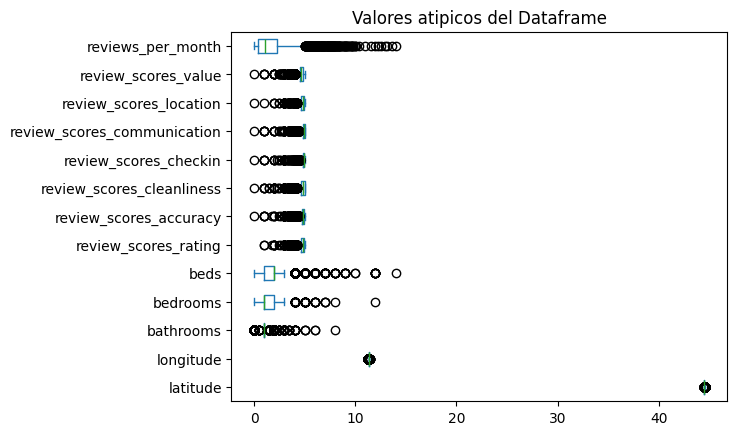

In [26]:
fig = plt.figure(figsize = (15,8))
cuantitativas.plot(kind='box', vert= False)
plt.title("Valores atipicos del Dataframe")
plt.show() #dibuja el driagrama de caja / bigote de cada columna del dataframe

In [27]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   latitude                     4843 non-null   float64
 1   longitude                    4843 non-null   float64
 2   bathrooms                    4843 non-null   float64
 3   bedrooms                     4843 non-null   float64
 4   beds                         4843 non-null   float64
 5   review_scores_rating         4843 non-null   float64
 6   review_scores_accuracy       4843 non-null   float64
 7   review_scores_cleanliness    4843 non-null   float64
 8   review_scores_checkin        4843 non-null   float64
 9   review_scores_communication  4843 non-null   float64
 10  review_scores_location       4843 non-null   float64
 11  review_scores_value          4843 non-null   float64
 12  reviews_per_month            4843 non-null   float64
dtypes: float64(13)
mem

Desviación estándar

In [28]:
#Método aplicando desviacipon estándar. Encuentro los valores extremos 
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()

print("Limite superior permitido ", Limite_Superior)
print("Limite inferior permitido ", Limite_Inferior)

Limite superior permitido  latitude                       44.531066
longitude                      11.405028
bathrooms                       2.659330
bedrooms                        3.464991
beds                            5.882276
review_scores_rating            5.687584
review_scores_accuracy          5.684629
review_scores_cleanliness       5.838344
review_scores_checkin           5.657893
review_scores_communication     5.703456
review_scores_location          5.606208
review_scores_value             5.710782
reviews_per_month               6.982943
dtype: float64
Limite inferior permitido  latitude                       44.464201
longitude                      11.284545
bathrooms                      -0.517476
bedrooms                       -0.912028
beds                           -2.144510
review_scores_rating            3.779486
review_scores_accuracy          3.885142
review_scores_cleanliness       3.682622
review_scores_checkin           3.992444
review_scores_communication  

In [30]:
data2 = cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

,latitude,longitude,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,44.485070,11.347860,1.0,1.0,1.0,4.64,4.77,4.65,4.92,4.88,4.87,4.66,1.37
1,44.491680,11.335140,1.0,1.0,1.0,4.72,4.74,4.60,4.83,4.85,4.84,4.67,2.57
2,44.478340,11.356720,2.0,2.0,5.0,4.91,4.92,4.83,4.98,4.98,4.80,4.81,0.39
3,44.491050,11.339820,2.5,2.0,2.0,4.90,4.82,4.92,4.94,4.93,4.97,4.86,1.68
4,44.487870,11.353920,1.0,1.0,1.0,4.84,4.92,4.95,4.90,4.92,4.84,4.78,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,44.488104,11.356577,1.0,1.0,1.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
4839,44.507605,11.343813,1.0,1.0,3.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4840,44.518077,NaN,1.0,1.0,2.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4841,44.495760,11.346430,1.0,1.0,1.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00


In [31]:
valores_nulos = data2.isnull().sum()
valores_nulos 

latitude                        75
longitude                       82
bathrooms                       63
bedrooms                        51
beds                            88
review_scores_rating            74
review_scores_accuracy          67
review_scores_cleanliness       83
review_scores_checkin           45
review_scores_communication     60
review_scores_location          46
review_scores_value             92
reviews_per_month              104
dtype: int64

In [32]:
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(),1))
data_clean

,latitude,longitude,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,44.485070,11.347860,1.0,1.0,1.0,4.64,4.77,4.65,4.92,4.88,4.87,4.66,1.37
1,44.491680,11.335140,1.0,1.0,1.0,4.72,4.74,4.60,4.83,4.85,4.84,4.67,2.57
2,44.478340,11.356720,2.0,2.0,5.0,4.91,4.92,4.83,4.98,4.98,4.80,4.81,0.39
3,44.491050,11.339820,2.5,2.0,2.0,4.90,4.82,4.92,4.94,4.93,4.97,4.86,1.68
4,44.487870,11.353920,1.0,1.0,1.0,4.84,4.92,4.95,4.90,4.92,4.84,4.78,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,44.488104,11.356577,1.0,1.0,1.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
4839,44.507605,11.343813,1.0,1.0,3.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4840,44.518077,11.300000,1.0,1.0,2.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4841,44.495760,11.346430,1.0,1.0,1.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00


In [33]:
valores_nulos = data_clean.isnull().sum()
valores_nulos

latitude                       0
longitude                      0
bathrooms                      0
bedrooms                       0
beds                           0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

Procedimiento: Cuartiles

In [34]:
y = cuantitativas
percentile25=y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print("Limite Superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite Superior permitido latitude                       44.518611
longitude                      11.377884
bathrooms                       1.000000
bedrooms                        3.500000
beds                            3.500000
review_scores_rating            5.345000
review_scores_accuracy          5.250000
review_scores_cleanliness       5.455000
review_scores_checkin           5.250000
review_scores_communication     5.300000
review_scores_location          5.370000
review_scores_value             5.280000
reviews_per_month               5.032500
dtype: float64
Limite inferior permitido latitude                       44.475728
longitude                      11.313092
bathrooms                       1.000000
bedrooms                       -0.500000
beds                           -0.500000
review_scores_rating            4.265000
review_scores_accuracy          4.450000
review_scores_cleanliness       4.215000
review_scores_checkin           4.530000
review_scores_communication    

In [35]:
data2_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

,latitude,longitude,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,44.485070,11.347860,1.0,1.0,1.0,4.64,4.77,4.65,4.92,4.88,4.87,4.66,1.37
1,44.491680,11.335140,1.0,1.0,1.0,4.72,4.74,4.60,4.83,4.85,4.84,4.67,2.57
2,44.478340,11.356720,NaN,2.0,NaN,4.91,4.92,4.83,4.98,4.98,4.80,4.81,0.39
3,44.491050,11.339820,NaN,2.0,2.0,4.90,4.82,4.92,4.94,4.93,4.97,4.86,1.68
4,44.487870,11.353920,1.0,1.0,1.0,4.84,4.92,4.95,4.90,4.92,4.84,4.78,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,44.488104,11.356577,1.0,1.0,1.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
4839,44.507605,11.343813,1.0,1.0,3.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4840,44.518077,NaN,1.0,1.0,2.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4841,44.495760,11.346430,1.0,1.0,1.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00


In [36]:
valores_nulos = data2_iqr.isnull().sum()
valores_nulos

latitude                        315
longitude                       510
bathrooms                      1085
bedrooms                         51
beds                            434
review_scores_rating            307
review_scores_accuracy          362
review_scores_cleanliness       297
review_scores_checkin           351
review_scores_communication     328
review_scores_location          191
review_scores_value             343
reviews_per_month               276
dtype: int64

In [37]:
data3_iqr=data2_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr

,latitude,longitude,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,44.485070,11.347860,1.0,1.0,1.0,4.64,4.77,4.65,4.92,4.88,4.87,4.66,1.37
1,44.491680,11.335140,1.0,1.0,1.0,4.72,4.74,4.60,4.83,4.85,4.84,4.67,2.57
2,44.478340,11.356720,1.0,2.0,1.6,4.91,4.92,4.83,4.98,4.98,4.80,4.81,0.39
3,44.491050,11.339820,1.0,2.0,2.0,4.90,4.82,4.92,4.94,4.93,4.97,4.86,1.68
4,44.487870,11.353920,1.0,1.0,1.0,4.84,4.92,4.95,4.90,4.92,4.84,4.78,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,44.488104,11.356577,1.0,1.0,1.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
4839,44.507605,11.343813,1.0,1.0,3.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4840,44.518077,11.300000,1.0,1.0,2.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4841,44.495760,11.346430,1.0,1.0,1.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00


In [38]:
Datos_limpios = pd.concat([cualitativas,data3_iqr],axis=1) #1 columnas , 0 filas
Datos_limpios

,Unnamed: 0,id,scrape_id,last_scraped,source,name,description,host_id,host_name,host_since,...,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,42196,20240917031409,2024-09-17,city scrape,50 sm Studio in the historic centre,The studio is a fully restored ancient basemen...,184487,Carlo,2010-07-29,...,1.0,1.0,4.64,4.77,4.65,4.92,4.88,4.87,4.66,1.37
1,1,46352,20240917031409,2024-09-17,city scrape,A room in Pasolini's house,"Simple, cozy and silent room in a lived house ...",467810,Eleonora,2011-03-28,...,1.0,1.0,4.72,4.74,4.60,4.83,4.85,4.84,4.67,2.57
2,2,85368,20240917031409,2024-09-17,city scrape,Garden House Bologna,No hay descripción,467675,Anna Maria,2011-03-28,...,2.0,1.6,4.91,4.92,4.83,4.98,4.98,4.80,4.81,0.39
3,3,204553,20240917031409,2024-09-17,city scrape,Private Room & Bath Ex-Convent in Centro Storico,The neighbourhood is the most prestigious of B...,569422,Elizabeth,2011-05-09,...,2.0,2.0,4.90,4.82,4.92,4.94,4.93,4.97,4.86,1.68
4,4,219878,20240917031409,2024-09-17,city scrape,Gorgeous Haven in Centro Storico,"Quiet, bright, fully equipped 800 square feet ...",1139326,Elisa,2011-09-10,...,1.0,1.0,4.84,4.92,4.95,4.90,4.92,4.84,4.78,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,4838,1241249863762824673,20240917031409,2024-09-17,city scrape,Ampia camera privata in Piazza Carducci,"Stanza in the center of Bologna, Piazza Carduc...",230198803,Federico,2018-12-11,...,1.0,1.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
4839,4839,1242502772226465971,20240917031409,2024-09-17,city scrape,Becky AP,"The Becky apartment is located in Bologna, 40 ...",226409261,Simone,2018-11-18,...,1.0,3.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4840,4840,1242647969427706172,20240917031409,2024-09-17,city scrape,Tra Cielo e Città: Bologna Home!,Discover an oasis of design and comfort in Bol...,651060509,Ett,2024-09-09,...,1.0,2.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00
4841,4841,1244917427835620228,20240917031409,2024-09-17,city scrape,Appartamento,A cozy and quiet apartment in the heart of Bol...,31962214,Irene,2015-04-26,...,1.0,1.0,4.70,4.80,5.00,4.80,4.80,4.80,4.60,1.00


In [39]:
Datos_limpios.to_csv("Bologna_limpios.csv")